importing Jupyter notebook from fonctions_1var.ipynb


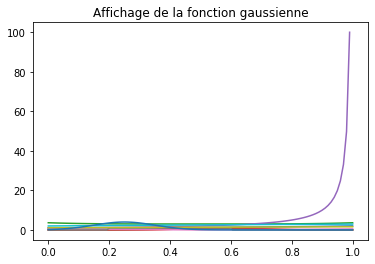

In [2]:
from math import *
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb 
from interp_1var import * 
from fonctions_1var import *

## Variation de l'erreur en fonction de h, epsilon et p

##### Etude de l'erreur en fonction de epsilon

epsilon =  0.1
Nombre d'itérations finales :  1


<Figure size 432x288 with 0 Axes>

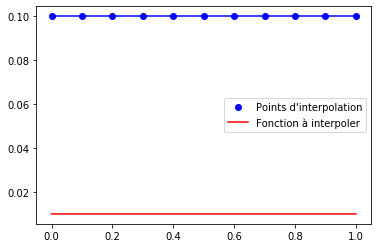

epsilon =  0.01
Nombre d'itérations finales :  1


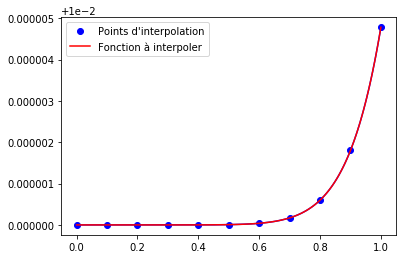

epsilon =  0.001
Nombre d'itérations finales :  1


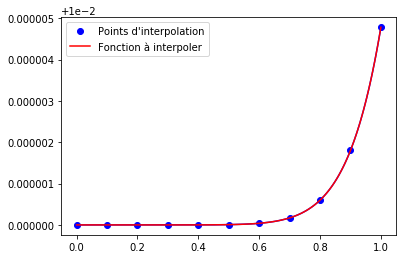

epsilon =  0.0001
Nombre d'itérations finales :  1


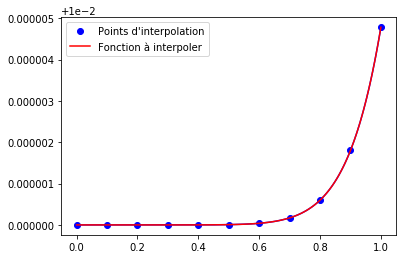

epsilon =  1e-05
Nombre d'itérations finales :  1


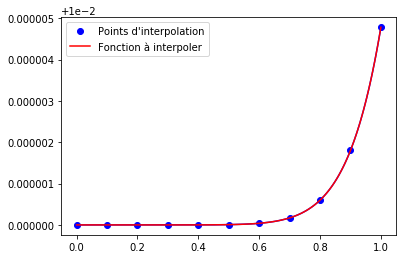

In [3]:
EPS = [0.1,0.01,0.001,0.0001,0.00001]
p = 10
h = 0.1
ERR_int = []

plt.figure()
for j in EPS :
    print("epsilon = ", j)
    poln, xn,err, pol, x, nit = interpol(p ,h, pol4, j)
    polynom_display(xn, poln, x, pol, h, pol4)
    ERR_int += [erreur(xn, poln, pol4, h)]
plt.show()

Ordre =  4.014249609948815


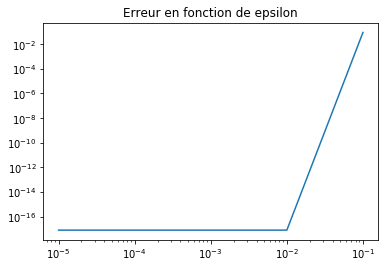

In [4]:
ERR_int = np.asarray(ERR_int)
EPS = np.asarray(EPS)
print("Ordre = ", find_order(EPS,ERR_int))


plt.figure()
plt.loglog(EPS, ERR_int)
plt.title("Erreur en fonction de epsilon")
plt.show()

Quand epsilon est trop haut, l'interpolation de la fonction est mauvaise car le polynome initial est déjà bon.
Quand espilon est trop petit, l'interpolation ne peut plus être prise en charge par le porgramme. 

##### Etude de l'erreur en fonction de H

h =  0.01
Nombre d'itérations finales :  1


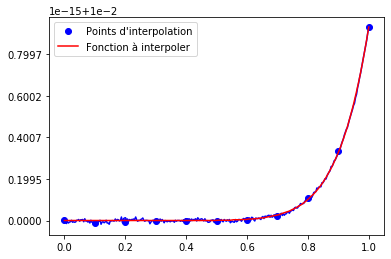

h =  0.03
Nombre d'itérations finales :  1


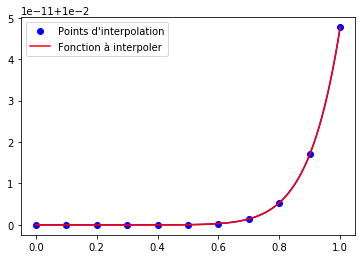

h =  0.06
Nombre d'itérations finales :  1


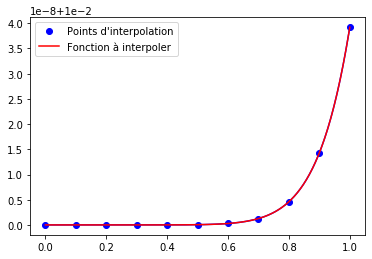

h =  0.1
Nombre d'itérations finales :  1


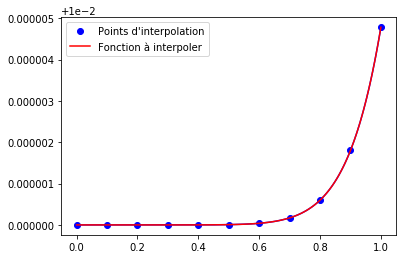

h =  0.13
Nombre d'itérations finales :  1


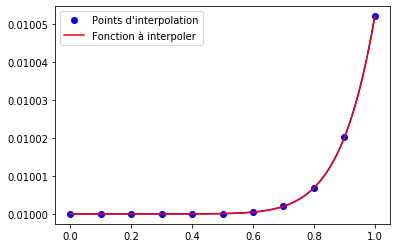

h =  0.16
Nombre d'itérations finales :  1


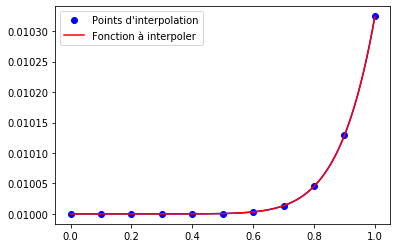

In [5]:
H = [0.01,0.03,0.06,0.1,0.13,0.16]
ERR_int = []

for i in H :
    print("h = ", i)
    poln, xn, err, pol, x, nit = interpol(p ,i, pol4)
    polynom_display(xn, poln,x,pol, i, pol4)
    ERR_int += [erreur(xn, poln, pol4, h)]

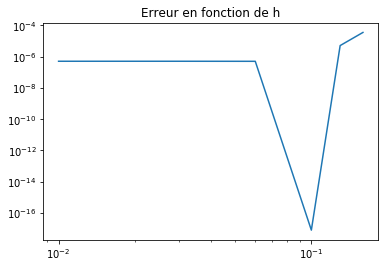

In [6]:
ERR_int = np.asarray(ERR_int)
H = np.asarray(H)
plt.figure()
plt.loglog(H, ERR_int)
plt.title("Erreur en fonction de h")
plt.show()

Quand h devient trop grand, il n'est plus possible de gérer l'interpolation 

##### Etude de l'erreur en fonction de P

P =  5
Nombre d'itérations finales :  9


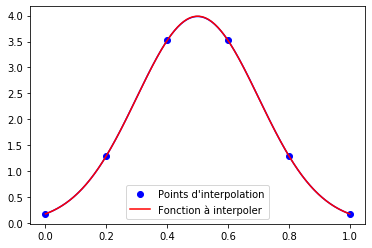

P =  15
Nombre d'itérations finales :  9


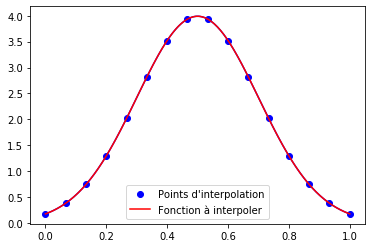

P =  25
Nombre d'itérations finales :  8


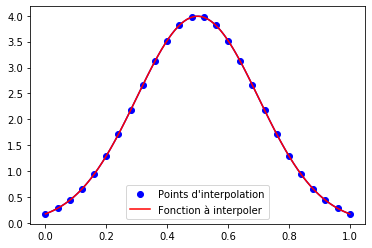

P =  35
Nombre d'itérations finales :  8


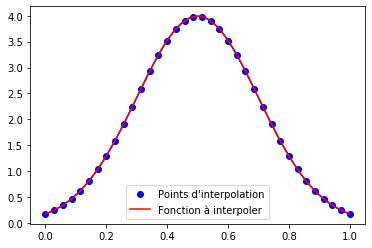

In [7]:
ERR_int = []
P = [5,15,25,35]
for p in P : 
    h = 1/2
    print("P = ", p)
    poln, xn, err, pol, x, nit = interpol(p ,h, gaussienne,1e-4)
    ERR_int += [erreur(xn, poln, pol4, h)]
    polynom_display(xn, poln, x, pol, h, gaussienne)

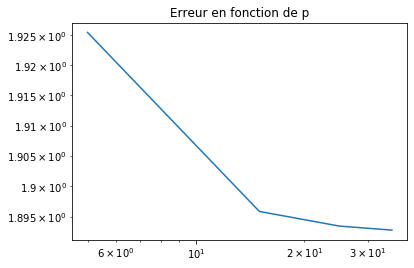

In [8]:
ERR_int = np.asarray(ERR_int)
P = np.asarray(P)
plt.figure()
plt.loglog(P, ERR_int)
plt.title("Erreur en fonction de p")
plt.show()

## Etude de l'ordre d'interpolation entre sinx et sinx + ax +b 

*L'idée est ici de montrer que sin(x) et sin(x) +ax+ b ont le même ordre de convergence même si les points d'interpolation obtenu ne sont pas les mêmes*

h =  0.1
Nombre d'itérations finales :  1


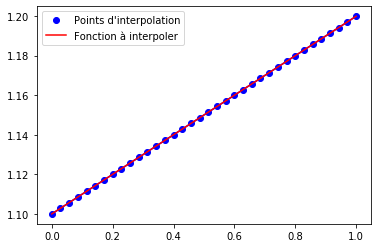

Nombre d'itérations finales :  1


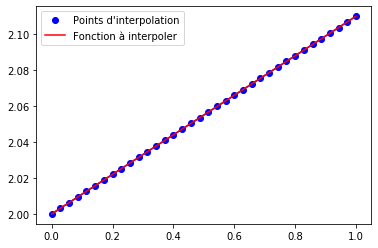

h =  0.05
Nombre d'itérations finales :  1


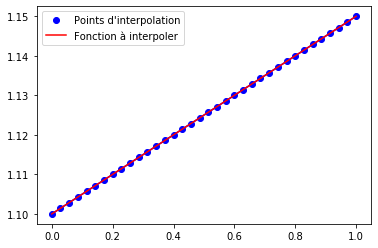

Nombre d'itérations finales :  1


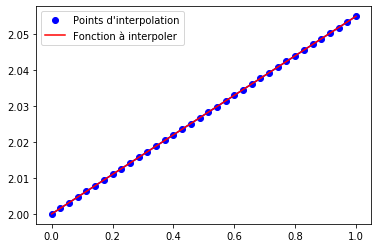

h =  0.01
Nombre d'itérations finales :  1


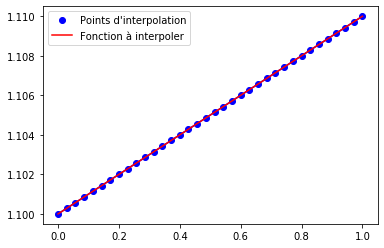

Nombre d'itérations finales :  1


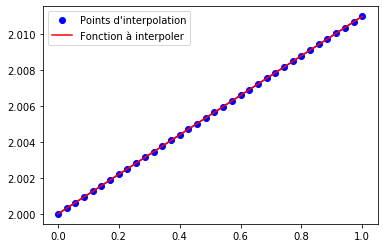

h =  0.005
Nombre d'itérations finales :  1


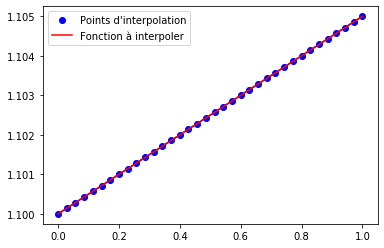

Nombre d'itérations finales :  1


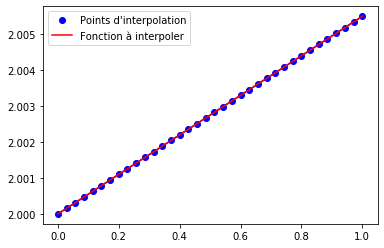

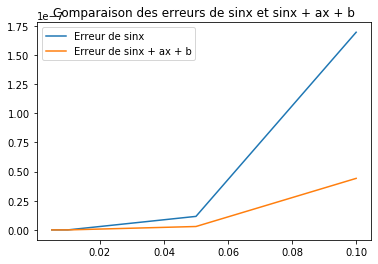

Ordre de la première méthode =  3.94251276244927
Ordre de la seconde méthode =  3.9635702686700363


In [9]:
H = [0.1,0.05,0.01,0.005]
ERR1 = []
ERR2 = []

for h in H : 
    print("h = ", h)
    poln, xn, err, pol, x, nit = interpol(p ,h, sin_off)
    polynom_display(xn, poln,x,pol, h, sin_off)
    ERR1 += [erreur(xn, poln, sin_off, h)]
    
    poln1, xn1, err1, pol1, x1, nit = interpol(p ,h, sin_ax_b)
    polynom_display(xn1, poln1,x1,pol1, h, sin_ax_b)
    ERR2 += [erreur(xn1, poln1, sin_ax_b, h)]

plt.figure()
plt.plot(H,ERR1, label = "Erreur de sinx")
plt.plot(H,ERR2, label = "Erreur de sinx + ax + b")
plt.title("Comparaison des erreurs de sinx et sinx + ax + b")
plt.legend()
plt.show()

print("Ordre de la première méthode = ", find_order(H, ERR1))
print("Ordre de la seconde méthode = ", find_order(H, ERR2))

## Etude de l'erreur des différentes façons de mesurer l'erreur d'interpolation

Nombre d'itérations finales :  5


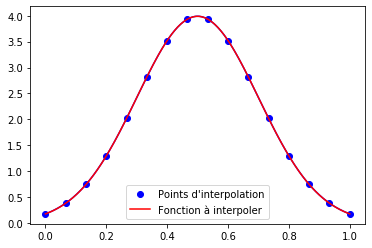

Erreur en npl.norm =  0.0031688770670287685
Erreur en quadrature =  0.0006653448829895029


In [10]:
p = 15
h = 0.5

poln, xn, err, pol, x, nit = interpol(p ,h, gaussienne,1e-3)
polynom_display(xn, poln, x, pol, h, gaussienne)

print("Erreur en npl.norm = ", npl.norm(poln - gaussienne(xn, h)))
print("Erreur en quadrature = ", erreur(xn, poln, gaussienne,h))